<a href="https://colab.research.google.com/github/krimoe/Apple_Strawberry_classifier-Deep-learning/blob/main/Apple_Strawberry_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator # il classifie les images selon le nombre des sous dossiers
train_path = '/content/drive/MyDrive/Apple Strawverries' # ici on écrit le dossier parent pas le sous dossier
train_gen = ImageDataGenerator()#horizontal_flip=True, vertical_flip=True, rotation_range=120, zoom_range=[0.3, 0.7],brightness_range=[0.9,1.8]# pour brightness la référence c'est 1, <1 il augmente, >1 il diminue et agit seulement pour les images ayant cette valeur à l'interieur de l'intervalle,vertical_flip:data augmentation, il ne change pas le nombre d'image car dans le cas contraire au moment du fiting il peut prendre dans un seul batch la même image sous différent angle ce qui provoque un overfiting, à chaque epoch il choisit des images au hasard (avec remise) pour leur faire flip
train  = train_gen.flow_from_directory(directory = train_path,class_mode = 'categorical',batch_size=20,target_size = (200, 200))# les images avec leurs étiquettes 0 ou 1, target_size il redimensionne toutes les images c'est pas target

Found 53 images belonging to 2 classes.


In [ ]:
train_images,train_labels = train.next() #change aléatoirement, .next() nous affiche un batch

In [ ]:
train_labels # [0., 1.] deuxième classe

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
train_labels.shape # (20 selon le batch_size, 2 nombre de classes)

(20, 2)

In [ ]:
train_images[3,:,:,:]

array([[[  2.,  65.,  44.],
        [  0.,  59.,  34.],
        [  2.,  48.,  22.],
        ...,
        [  7., 141.,  90.],
        [ 57., 194., 168.],
        [  9., 166., 121.]],

       [[  3.,  74.,  44.],
        [ 12.,  70.,  48.],
        [ 11.,  51.,  53.],
        ...,
        [ 21., 187., 149.],
        [  0., 138.,  89.],
        [  3., 158., 116.]],

       [[  3.,  77.,  50.],
        [ 11., 174., 129.],
        [ 14., 179., 139.],
        ...,
        [  6., 158., 120.],
        [ 17., 162., 133.],
        [ 47., 187., 160.]],

       ...,

       [[  3.,  56.,  14.],
        [  0.,  20.,   0.],
        [ 13., 172., 106.],
        ...,
        [  7.,  82.,  51.],
        [  9., 108.,  79.],
        [  2., 121.,  81.]],

       [[  0.,  45.,   6.],
        [  7.,  53.,  14.],
        [  0., 101.,  35.],
        ...,
        [ 10.,  90.,  55.],
        [  7.,  92.,  59.],
        [  1.,  71.,  35.]],

       [[  1.,  52.,  11.],
        [  6.,  48.,  12.],
        [  0.,  

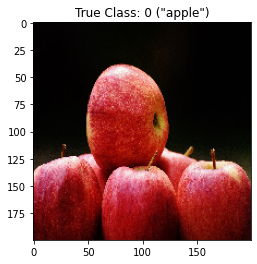

In [ ]:
text_labels = ['apple', 'strawberry']# il faut respecter l'odre
import matplotlib.pyplot as plt
train_labels_vec=np.argmax(train_labels,axis=1)

plt.figure()
random_index = np.random.randint(0, 20) # 20 selon batch_size
#plt.imshow(train_labels_vec[random_index]
#plt.colorbar()
numerical_label = train_labels_vec[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))
plt.imshow(train_images[random_index,:,:,:].astype("uint8"))

In [ ]:
num_classes = 2
image_width = 200
image_height = 200
num_channels = 3 # 3 car en couleur, 1 pour greyscalle

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
mycallbacks=[EarlyStopping(monitor='val_loss',patience=5)]#patience=5 il va faire plus d'epochs que patience=2

def build_model():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='valid',))# convolution avant model
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid',))# convolution avant model
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
model = build_model()

In [ ]:
history = model.fit(train, epochs=20)# on a fait epochs=50
                 

#history = model.fit(train, epochs=10)

Epoch 1/20
3/3 [==============================] - 51s 12s/step - loss: 277.3880 - accuracy: 0.5472
Epoch 2/20
3/3 [==============================] - 16s 5s/step - loss: 285.6833 - accuracy: 0.4906
Epoch 3/20
3/3 [==============================] - 16s 4s/step - loss: 29.1535 - accuracy: 0.4340
Epoch 4/20
3/3 [==============================] - 16s 5s/step - loss: 14.4326 - accuracy: 0.5283
Epoch 5/20
3/3 [==============================] - 16s 5s/step - loss: 2.6704 - accuracy: 0.4906
Epoch 6/20
3/3 [==============================] - 16s 5s/step - loss: 0.3419 - accuracy: 0.8679
Epoch 7/20
3/3 [==============================] - 17s 6s/step - loss: 0.2525 - accuracy: 0.9623
Epoch 8/20
3/3 [==============================] - 16s 5s/step - loss: 0.2310 - accuracy: 0.9434
Epoch 9/20
3/3 [==============================] - 16s 6s/step - loss: 0.1739 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 16s 5s/step - loss: 0.1984 - accuracy: 0.8868
Epoch 11/20
3/3 [===============

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 32)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, None)              0         
                                                                 
 dense (Dense)               (None, 32)                4

In [ ]:
score = model.evaluate(train, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 1.0


<function matplotlib.pyplot.show>

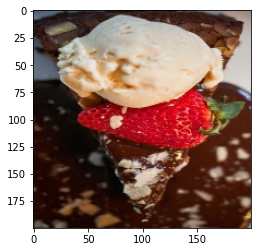

In [ ]:
import cv2
src1 = cv2.imread('/content/aaa.jpg')#cv2.IMREAD_GRAYSCALE)
src1= cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)
src1=cv2.resize(src1,(200,200))
#plt.figure(figsize=(18,8), dpi=80)
plt.imshow(src1,cmap='gray')
plt.show

In [ ]:
t=src1.reshape(-1,200,200,3)

In [ ]:
model.predict(t)
print(model.predict(t))
print(text_labels)

[[9.999999e-01 6.379562e-08]]
['apple', 'strawberry']


<function matplotlib.pyplot.show>

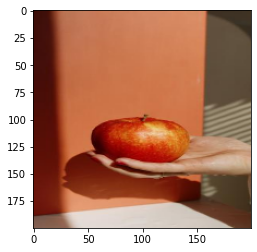

In [ ]:
import cv2
src2 = cv2.imread('/content/bb.jpg')#cv2.IMREAD_GRAYSCALE)
src2= cv2.cvtColor(src2, cv2.COLOR_BGR2RGB)
src2=cv2.resize(src2,(200,200))
#plt.figure(figsize=(18,8), dpi=80)
plt.imshow(src2,cmap='gray')
plt.show

In [ ]:
y=src2.reshape(-1,200,200,3)

In [ ]:
print(model.predict(y))
print(text_labels)

[[0.99359024 0.00640981]]
['apple', 'strawberry']


**MODEL AUGMENTE**

In [ ]:
train_gen = ImageDataGenerator(horizontal_flip=True)#horizontal_flip=True, vertical_flip=True, rotation_range=120, zoom_range=[0.3, 0.7],brightness_range=[0.9,1.8]# pour brightness la référence c'est 1, <1 il augmente, >1 il diminue et agit seulement pour les images ayant cette valeur à l'interieur de l'intervalle,vertical_flip:data augmentation, il ne change pas le nombre d'image car dans le cas contraire au moment du fiting il peut prendre dans un seul batch la même image sous différent angle ce qui provoque un overfiting, à chaque epoch il choisit des images au hasard (avec remise) pour leur faire flip
train  = train_gen.flow_from_directory(directory = train_path,class_mode = 'categorical',batch_size=20,target_size = (200, 200))#

Found 53 images belonging to 2 classes.


In [ ]:
model_aug = build_model()

In [ ]:
history = model_aug.fit(train, epochs=20)

Epoch 1/20
3/3 [==============================] - 17s 4s/step - loss: 151.2025 - accuracy: 0.5094
Epoch 2/20
3/3 [==============================] - 16s 4s/step - loss: 76.9141 - accuracy: 0.5660
Epoch 3/20
3/3 [==============================] - 17s 6s/step - loss: 76.6870 - accuracy: 0.5094
Epoch 4/20
3/3 [==============================] - 17s 6s/step - loss: 14.8395 - accuracy: 0.5472
Epoch 5/20
3/3 [==============================] - 16s 4s/step - loss: 1.0173 - accuracy: 0.8302
Epoch 6/20
3/3 [==============================] - 16s 5s/step - loss: 2.1985 - accuracy: 0.8679
Epoch 7/20
3/3 [==============================] - 16s 5s/step - loss: 0.9368 - accuracy: 0.9057
Epoch 8/20
3/3 [==============================] - 16s 5s/step - loss: 0.4298 - accuracy: 0.9245
Epoch 9/20
3/3 [==============================] - 17s 6s/step - loss: 0.3008 - accuracy: 0.9623
Epoch 10/20
3/3 [==============================] - 16s 6s/step - loss: 0.0667 - accuracy: 0.9811
Epoch 11/20
3/3 [=================

<function matplotlib.pyplot.show>

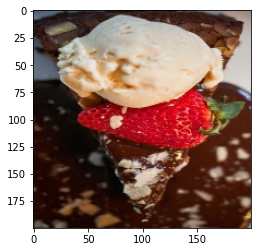

In [ ]:
import cv2
src1 = cv2.imread('/content/aaa.jpg')#cv2.IMREAD_GRAYSCALE)
src1= cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)
src1=cv2.resize(src1,(200,200))
#plt.figure(figsize=(18,8), dpi=80)
plt.imshow(src1,cmap='gray')
plt.show

In [ ]:
src1.shape

(200, 200, 3)

In [ ]:
t=src1.reshape(-1,200,200,3)

In [ ]:
model_aug.predict(t)
print(model_aug.predict(t))
print(text_labels)

[[9.999999e-01 6.379562e-08]]
['apple', 'strawberry']


<function matplotlib.pyplot.show>

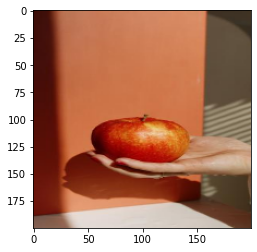

In [ ]:
import cv2
src2 = cv2.imread('/content/bb.jpg')#cv2.IMREAD_GRAYSCALE)
src2= cv2.cvtColor(src2, cv2.COLOR_BGR2RGB)
src2=cv2.resize(src2,(200,200))
#plt.figure(figsize=(18,8), dpi=80)
plt.imshow(src2,cmap='gray')
plt.show

In [ ]:
src2.shape

(200, 200, 3)

In [ ]:
y=src2.reshape(-1,200,200,3)

In [ ]:
model_aug.predict(t)
print(model_aug.predict(y))
print(text_labels)

[[0.99359024 0.00640981]]
['apple', 'strawberry']


**TRANSFER LEARNING with VGG-16**(utilisation d'un ancien model performant dans l'architecture d'un nouveau model, pour faire sa performance)

In [ ]:
train_gen = ImageDataGenerator()#horizontal_flip=True, vertical_flip=True, rotation_range=120, zoom_range=[0.3, 0.7],brightness_range=[0.9,1.8]# pour brightness la référence c'est 1, <1 il augmente, >1 il diminue et agit seulement pour les images ayant cette valeur à l'interieur de l'intervalle,vertical_flip:data augmentation, il ne change pas le nombre d'image car dans le cas contraire au moment du fiting il peut prendre dans un seul batch la même image sous différent angle ce qui provoque un overfiting, à chaque epoch il choisit des images au hasard (avec remise) pour leur faire flip
train  = train_gen.flow_from_directory(directory = train_path,class_mode = 'categorical',batch_size=53,target_size = (200, 200))

Found 53 images belonging to 2 classes.


In [ ]:
train_images,train_labels = train.next()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Load VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape= train_images[0].shape) 
base_model.trainable = False ##weights not trainable

train_ds = preprocess_input(train_images)

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
model_transfert = Sequential([base_model,
                              Flatten(),
                              Dense(128, activation ='relu'),
                              Dense(2, activation ='softmax'),
                              ])

In [ ]:
model_transfert.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_transfert.fit(train_images, train_labels, epochs=12)


Epoch 1/12
2/2 [==============================] - 5s 2s/step - loss: 26.2715 - accuracy: 0.5472
Epoch 2/12
2/2 [==============================] - 0s 113ms/step - loss: 15.2002 - accuracy: 0.6604
Epoch 3/12
2/2 [==============================] - 0s 111ms/step - loss: 1.3196 - accuracy: 0.9245
Epoch 4/12
2/2 [==============================] - 0s 112ms/step - loss: 1.7900 - accuracy: 0.9057
Epoch 5/12
2/2 [==============================] - 0s 113ms/step - loss: 0.1120 - accuracy: 0.9811
Epoch 6/12
2/2 [==============================] - 0s 114ms/step - loss: 4.3503e-05 - accuracy: 1.0000
Epoch 7/12
2/2 [==============================] - 0s 110ms/step - loss: 3.4021e-05 - accuracy: 1.0000
Epoch 8/12
2/2 [==============================] - 0s 113ms/step - loss: 2.1849e-05 - accuracy: 1.0000
Epoch 9/12
2/2 [==============================] - 0s 115ms/step - loss: 1.2686e-05 - accuracy: 1.0000
Epoch 10/12
2/2 [==============================] - 0s 111ms/step - loss: 1.0748e-05 - accuracy: 1.0000


<function matplotlib.pyplot.show>

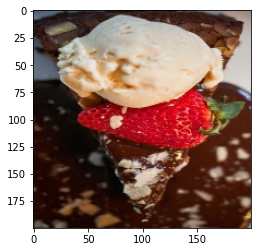

In [ ]:
import cv2
src2 = cv2.imread('/content/aaa.jpg')#cv2.IMREAD_GRAYSCALE)
src2= cv2.cvtColor(src2, cv2.COLOR_BGR2RGB)
src2=cv2.resize(src2,(200,200))
#plt.figure(figsize=(18,8), dpi=80)
plt.imshow(src2,cmap='gray')
plt.show

In [ ]:
t=src2.reshape(-1,200,200,3)

In [ ]:
model_transfert.predict(t)
print(model_transfert.predict(y))
print(text_labels)

[[9.9992335e-01 7.6660479e-05]]
['apple', 'strawberry']


<function matplotlib.pyplot.show>

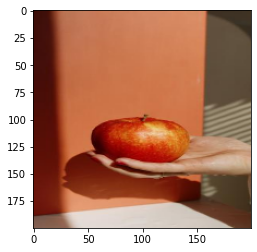

In [ ]:
import cv2
src2 = cv2.imread('/content/bb.jpg')#cv2.IMREAD_GRAYSCALE)
src2= cv2.cvtColor(src2, cv2.COLOR_BGR2RGB)
src2=cv2.resize(src2,(200,200))
#plt.figure(figsize=(18,8), dpi=80)
plt.imshow(src2,cmap='gray')
plt.show

In [ ]:
t=src2.reshape(-1,200,200,3)

In [ ]:
model_transfert.predict(t)
print(model_transfert.predict(y))
print(text_labels)

[[9.9992335e-01 7.6660479e-05]]
['apple', 'strawberry']
